In [17]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

df_fake = pd.read_csv(path + "/Fake.csv")
df_true = pd.read_csv(path + "/True.csv")

print("Fake news dataset shape:", df_fake.shape)
print("Real news dataset shape:", df_true.shape)

Path to dataset files: C:\Users\clem9\.cache\kagglehub\datasets\clmentbisaillon\fake-and-real-news-dataset\versions\1
Fake news dataset shape: (23481, 4)
Real news dataset shape: (21417, 4)


In [18]:
print(df_fake.head())
print(df_true.head())

df_fake["label"] = "fake"
df_true["label"] = "real"

df = pd.concat([df_fake, df_true]).reset_index(drop=True)
print("Combined dataset shape:", df.shape)
print(df.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [19]:
# ============================================
# 3. EXPLORATION DES DONNÉES
# ============================================

print("\n=== EXPLORATION ===")
print(f"Total articles: {len(df)}")
print(f"\nDistribution des labels:")
print(df['label'].value_counts())

print(f"\nColonnes disponibles:")
print(df.columns.tolist())

print(f"\nValeurs manquantes:")
print(df.isnull().sum())

# Afficher quelques exemples
print(f"\n=== Exemple FAKE NEWS ===")
print(df[df['label']=='fake'].iloc[0]['text'][:500])

print(f"\n=== Exemple REAL NEWS ===")
print(df[df['label']=='real'].iloc[0]['text'][:500])

# Statistiques sur la longueur des textes
df['text_length'] = df['text'].str.len()
print(f"\n=== Longueur des textes ===")
print(df.groupby('label')['text_length'].describe())


# ============================================
# 4. NETTOYAGE (si nécessaire)
# ============================================

# Supprimer les valeurs manquantes
df_clean = df.dropna(subset=['text', 'label']).copy()
print(f"\nAprès nettoyage: {len(df_clean)} articles")

# Supprimer les doublons
df_clean = df_clean.drop_duplicates(subset=['text'])
print(f"Après suppression doublons: {len(df_clean)} articles")


=== EXPLORATION ===
Total articles: 44898

Distribution des labels:
label
fake    23481
real    21417
Name: count, dtype: int64

Colonnes disponibles:
['title', 'text', 'subject', 'date', 'label']

Valeurs manquantes:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

=== Exemple FAKE NEWS ===
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a gr

=== Exemple REAL NEWS ===
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national

In [ ]:
# ============================================
# 5. TRAIN/TEST SPLIT
# ============================================

from sklearn.model_selection import train_test_split

# Convertir les labels en format numérique pour le modèle
df_clean['label_numeric'] = df_clean['label'].map({'fake': 0, 'real': 1})

# Split 80/20
train_df, test_df = train_test_split(
    df_clean, 
    test_size=0.2, 
    random_state=42,
    stratify=df_clean['label_numeric']  # Pour garder la même proportion fake/real
)

print(f"\n=== SPLIT ===")
print(f"Train set: {len(train_df)} articles")
print(f"Test set: {len(test_df)} articles")

print(f"\nDistribution Train:")
print(train_df['label'].value_counts())

print(f"\nDistribution Test:")
print(test_df['label'].value_counts())

# ============================================
# 6. SAUVEGARDER LES DATASETS
# ============================================

# Créer un dossier data/ si il n'existe pas
import os
os.makedirs('data', exist_ok=True)

# Sauvegarder
train_df.to_csv('data/train.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

print("\nDatasets sauvegardés dans data/train.csv et data/test.csv")


=== SPLIT ===
Train set: 30916 articles
Test set: 7730 articles

Distribution Train:
label
real    16952
fake    13964
Name: count, dtype: int64

Distribution Test:
label
real    4239
fake    3491
Name: count, dtype: int64

✅ Datasets sauvegardés dans data/train.csv et data/test.csv



Visualisation sauvegardée dans data_exploration.png


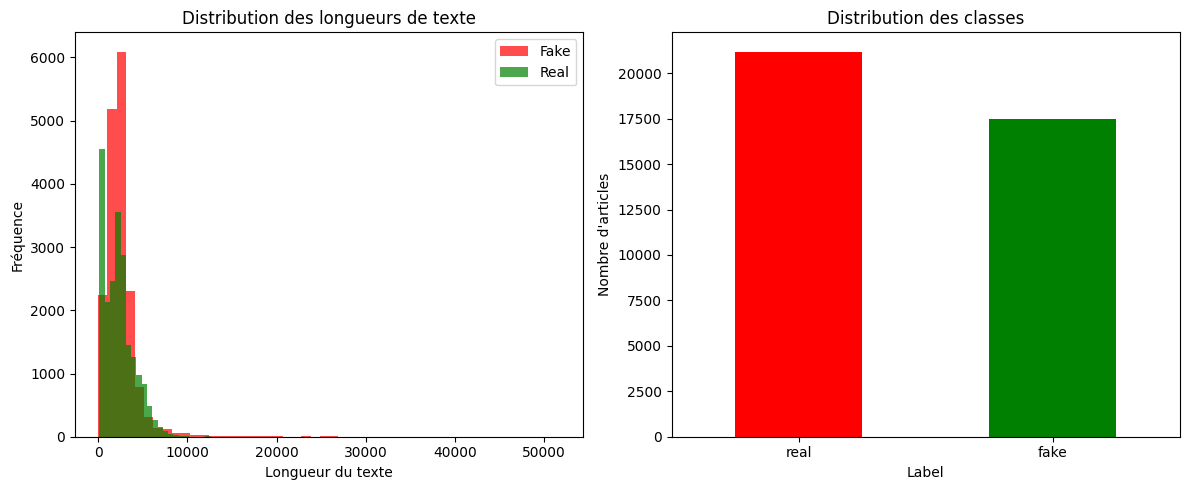

In [ ]:
# ============================================
# 7. VISUALISATION (BONUS)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des longueurs de texte
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_clean[df_clean['label']=='fake']['text_length'], 
         bins=50, alpha=0.7, label='Fake', color='red')
plt.hist(df_clean[df_clean['label']=='real']['text_length'], 
         bins=50, alpha=0.7, label='Real', color='green')
plt.xlabel('Longueur du texte')
plt.ylabel('Fréquence')
plt.legend()
plt.title('Distribution des longueurs de texte')

plt.subplot(1, 2, 2)
df_clean['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Label')
plt.ylabel('Nombre d\'articles')
plt.title('Distribution des classes')
plt.xticks(rotation=0)

plt.tight_layout()
print("\nVisualisation sauvegardée dans data_exploration.png")
plt.show()